<a href="https://colab.research.google.com/github/josegabrielguerrero26/CSE450-machinelearning/blob/main/project1/Starter_bankV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ** INTRODUCTION**
https://byui-cse.github.io/cse450-course/module-02/intro.html

https://byui-cse.github.io/cse450-course/module-02/bank-dictionary.txt

You've just been hired as a junior data scientist for Banco Federal de Finanças in Aveiro, Portugal. They just finished a major telemarketing campaign and management was not happy with the results.

They feel like machine learning could help them create a more targeted campaign. You and your team have been brought in to discuss the situation.

**STAKEHOLDER FOCUS AREAS**

The shareholders are particularly interested in the following areas:


*   Finding interesting customer segments based on their previous marketing campaign.
*   Finding a way to identify the types of customers most likely to respond favorably to future marketing campaigns.

*  Proving to a skeptical Senhor Ferreira that a targeted campaign based on data science will significantly outperform a campaign made up of randomly selected customers.


You've been invited to dinner tomorrow night with the President of the bank, VP of Marketing, and the Senior Data Scientist. They're planning to discuss the marketing campaign and would like your input on a few key points.

## Libraries- Dataset

In [ ]:
#!pip install ydata_profiling # data Table Analysis
#!pip install typing_extensions # data Table Analysis
!pip install imblearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # for graphs
from sklearn.model_selection import train_test_split #Model Split to train
from sklearn.metrics import accuracy_score           #Accuracy model
from sklearn.preprocessing import StandardScaler

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [ ]:
campaign.head(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



## Table Description

In [ ]:
campaign.describe(include='all')
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [ ]:
campaign.nunique()
campaign['job'].unique()


array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'unemployed', 'self-employed', 'unknown', 'management',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
#nun values
nan_count = campaign.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 0


## Data Wrangling - Missing Values, transformation


https://jamesrledoux.com/code/imputation

In [ ]:
#unkown values

(campaign=='unknown').sum()

age                  0
job                294
marital             69
education         1535
default           7725
housing            894
loan               894
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [ ]:
campaign[campaign.default=='unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
14,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36790,70,retired,married,basic.4y,unknown,no,no,cellular,oct,thu,1,14,3,failure,-1.1,94.601,-49.5,0.965,4963.6,no
36843,49,admin.,married,high.school,unknown,no,no,cellular,oct,wed,1,6,3,success,-1.1,94.601,-49.5,0.985,4963.6,yes
36844,66,retired,married,basic.4y,unknown,unknown,unknown,cellular,oct,wed,1,6,3,success,-1.1,94.601,-49.5,0.985,4963.6,yes
36867,84,retired,divorced,basic.4y,unknown,yes,no,cellular,oct,fri,4,999,0,nonexistent,-1.1,94.601,-49.5,0.993,4963.6,no


In [ ]:
# from unkown to NAN
import numpy as np
df = campaign
df.replace(r"unknown", np.nan, inplace=True)

In [ ]:
df.isnull().sum()
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# most common imputed

df_im = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_im.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<ipython-input-292-cc359407d008>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_im.corr()


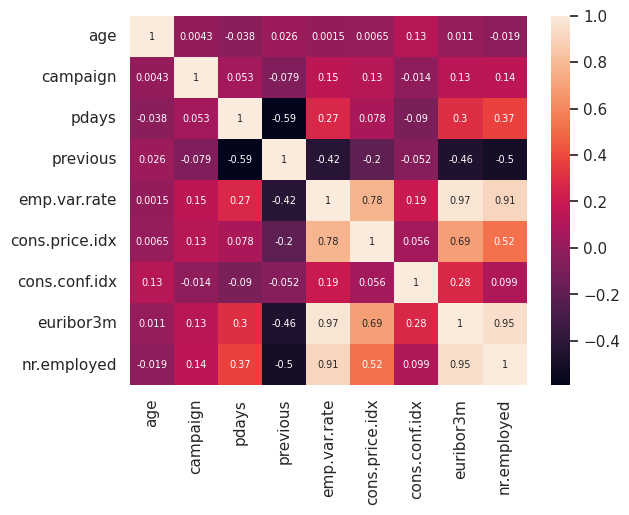

<Figure size 2000x1000 with 0 Axes>

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.004310,-0.037668,0.026322,0.001472,0.006474,0.127505,0.010602,-0.019048
campaign,0.004310,1.000000,0.053393,-0.079093,0.150322,0.129165,-0.014091,0.134610,0.143399
pdays,-0.037668,0.053393,1.000000,-0.590651,0.271839,0.077590,-0.089826,0.298171,0.374712
previous,0.026322,-0.079093,-0.590651,1.000000,-0.421712,-0.204256,-0.051850,-0.455023,-0.501523
emp.var.rate,0.001472,0.150322,0.271839,-0.421712,1.000000,0.775143,0.193378,0.972126,0.906928
cons.price.idx,0.006474,0.129165,0.077590,-0.204256,0.775143,1.000000,0.055767,0.687888,0.521864
cons.conf.idx,0.127505,-0.014091,-0.089826,-0.051850,0.193378,0.055767,1.000000,0.275595,0.099269
euribor3m,0.010602,0.134610,0.298171,-0.455023,0.972126,0.687888,0.275595,1.000000,0.945194
nr.employed,-0.019048,0.143399,0.374712,-0.501523,0.906928,0.521864,0.099269,0.945194,1.000000


In [ ]:
corrMatrix = df_im.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 7})
plt.figure(figsize=(20, 10))
plt.show()

corrMatrix

## Encoded Values

In [ ]:
df_im['loan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
# label encoded values for matrital, job and education

df_im['marital'] = df_im['marital'].astype('category')
df_im['contact'] = df_im['contact'].astype('category')
df_im['default'] = df_im['default'].astype('category')
df_im['housing'] = df_im['housing'].astype('category')
df_im['loan'] = df_im['loan'].astype('category')
df_im['day_of_week'] = df_im['day_of_week'].astype('category')
df_im['y'] = df_im['y'].astype('category')

# cat codes
df_im['marital'] = df_im['marital'].cat.codes
df_im['contact'] = df_im['contact'].cat.codes
df_im['default'] = df_im['default'].cat.codes
df_im['housing'] = df_im['housing'].cat.codes
df_im['loan']=df_im['loan'].cat.codes
df_im['day_of_week'] = df_im['day_of_week'].cat.codes
df_im['y'] = df_im['y'].cat.codes
df_im=pd.get_dummies(df_im, columns=['job'], drop_first=True)
df_im=pd.get_dummies(df_im, columns=['education'], drop_first=True)
df_im = pd.get_dummies(df_im, columns=['month'], drop_first=True)

df_im.columns

In [ ]:
df_im['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
df_im['poutcome'] = np.where((df_im["poutcome"] == "nonexistent") | (df_im["poutcome"] == "failure"), 0, 1)


In [ ]:
df_im['poutcome']. unique()

array([0, 1])

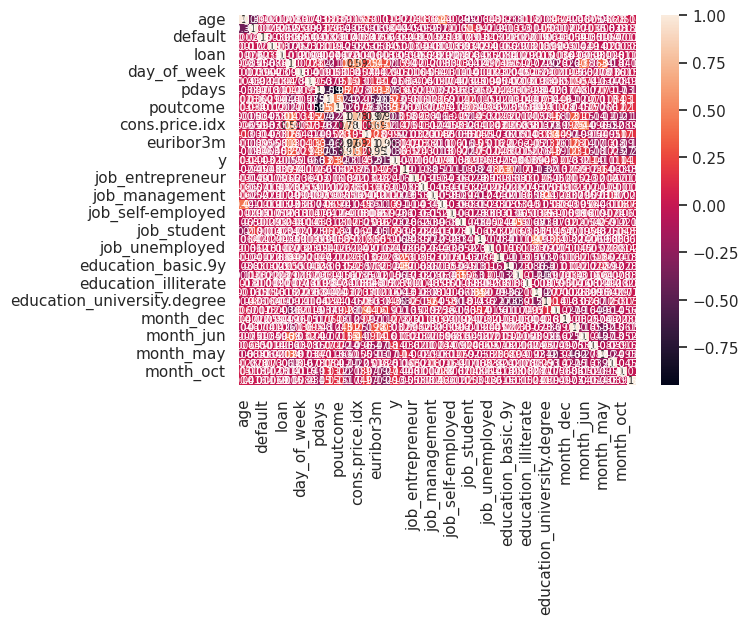

<Figure size 2000x1000 with 0 Axes>

,age,marital,default,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
age,1.000000,-0.392597,0.001990,-0.001654,-0.007136,0.008344,-0.017460,0.004310,-0.037668,0.026322,0.039157,0.001472,0.006474,0.127505,0.010602,-0.019048,0.031650,-0.024158,0.031017,0.086364,0.062268,0.440487,-0.002888,-0.064520,-0.201277,-0.064440,-0.003624,0.012328,-0.037825,-0.107336,0.018369,0.001634,-0.040108,0.066644,0.042260,-0.045683,-0.007495,0.006398,-0.065836,0.028448,0.050571,0.040271
marital,-0.392597,1.000000,-0.002526,0.011740,0.006181,-0.055429,0.003946,-0.009228,-0.036818,0.035854,0.034208,-0.082638,-0.059124,-0.030527,-0.089385,-0.083610,0.044216,-0.044923,-0.049085,-0.057360,-0.052336,-0.108639,0.001548,-0.010445,0.187583,0.042078,-0.011999,-0.040702,-0.029714,0.033207,-0.010141,-0.014578,0.086169,-0.001691,0.002231,0.017448,-0.011381,0.035438,-0.008283,-0.028226,0.018173,0.016157
default,0.001990,-0.002526,1.000000,-0.003908,-0.003789,-0.006830,0.006390,-0.004007,0.001764,0.002894,-0.001672,0.004683,-0.003321,0.004719,0.005555,0.006262,-0.003219,-0.004843,-0.001721,-0.001468,-0.002495,-0.001869,-0.001697,-0.002927,-0.001330,0.012233,0.017918,-0.002195,-0.003726,0.002190,-0.000187,0.014511,-0.006411,0.013026,-0.000589,-0.004127,-0.003477,-0.001048,-0.006367,0.007012,-0.001205,-0.001060
housing,-0.001654,0.011740,-0.003908,1.000000,0.037476,-0.076037,0.002309,-0.012885,-0.011117,0.019175,0.012000,-0.057953,-0.075472,-0.033067,-0.057532,-0.044935,0.010232,-0.012532,0.003028,-0.004291,-0.010100,-0.001327,0.000591,-0.003039,0.004226,0.009375,0.010264,-0.006589,-0.002903,-0.007348,-0.002066,0.012898,0.009926,0.024265,0.005148,-0.004189,-0.048658,0.014377,-0.020334,0.030050,0.003792,0.006936
loan,-0.007136,0.006181,-0.003789,0.037476,1.000000,-0.011605,-0.008951,0.003950,-0.000466,-0.004603,-0.000220,0.001011,-0.004034,-0.015630,-0.001331,0.003293,-0.004992,-0.009737,-0.006568,-0.002817,-0.002917,-0.007239,-0.007843,0.002420,0.003400,-0.003452,-0.002704,-0.008413,-0.010167,0.002902,0.002140,0.001478,0.010228,-0.003580,0.004856,0.016309,-0.006897,-0.003104,-0.000276,-0.006079,-0.010539,-0.000998
contact,0.008344,-0.055429,-0.006830,-0.076037,-0.011605,1.000000,-0.007297,0.077859,0.120127,-0.214699,-0.113687,0.395053,0.592445,0.253016,0.401556,0.270745,-0.145960,0.094018,0.019655,0.012420,-0.008965,-0.033437,0.001283,0.033643,-0.041793,-0.048752,0.007289,0.045915,0.054770,0.011872,-0.007686,-0.021781,-0.092408,-0.280460,-0.026457,-0.206554,0.384097,-0.062576,0.344967,-0.180771,-0.041202,-0.050466
day_of_week,-0.017460,0.003946,0.006390,0.002309,-0.008951,-0.007297,1.000000,-0.041330,-0.009081,-0.005280,0.010693,0.034189,0.005725,0.044218,0.040382,0.029414,0.016019,0.010788,-0.006367,0.005516,0.004045,0.002961,-0.011402,-0.001385,0.001015,-0.001264,-0.002266,0.011886,-0.000431,-0.005227,0.001757,0.002932,-0.011139,0.020931,-0.001503,0.036255,-0.031830,-0.007787,0.007279,0.015893,0.001549,0.008388
campaign,0.004310,-0.009228,-0.004007,-0.012885,0.003950,0.077859,-0.041330,1.000000,0.053393,-0.079093,-0.050938,0.150322,0.129165,-0.014091,0.134610,0.143399,-0.066148,0.001966,-0.000013,0.004054,-0.009722,-0.007390,0.004658,0.002969,-0.024660,-0.000994,-0.004490,-0.000470,-0.002044,0.000303,-0.001894,0.003757,-0.004586,0.015442,-0.010963,0.094675,0.074140,-0.016475,-0.033649,-0.078233,-0.049304,-0.033976
pdays,-0.037668,-0.036818,0.001764,-0.011117,-0.000466,0.120127,-0.009081,0.053393,1.000000,-0.590651,-0.948213,0.271839,0.077590,-0.089826,0.298171,0.374712,-0.328805,0.066229,0.019702,-0.002141,0.0038

In [ ]:
corrMatrix = df_im.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 7})
plt.figure(figsize=(20, 10))
plt.show()

corrMatrix

## Standarized

In [ ]:
# Use StandardScaler() to normolize data around a mean of 0

## Data Table Analysis

Text(0.5, 1.0, 'Age Histogram')

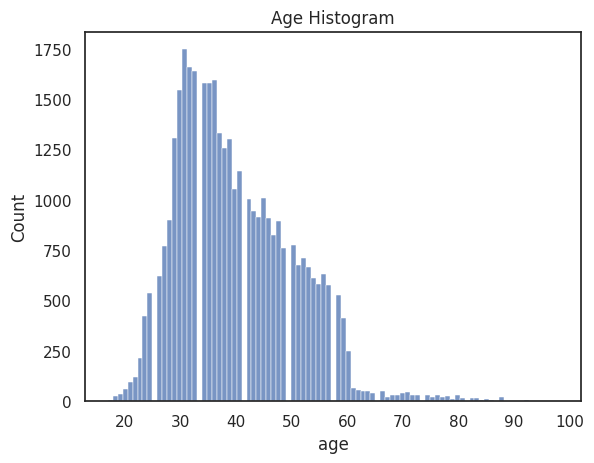

In [ ]:
sns.set()
sns.set_style('white')
graph1=sns.histplot(data=df_im, x='age', bins='auto')#hue='species'
graph1.set_title("Age Histogram")

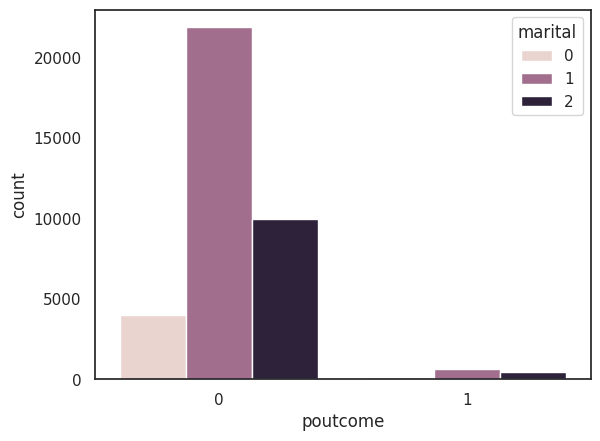

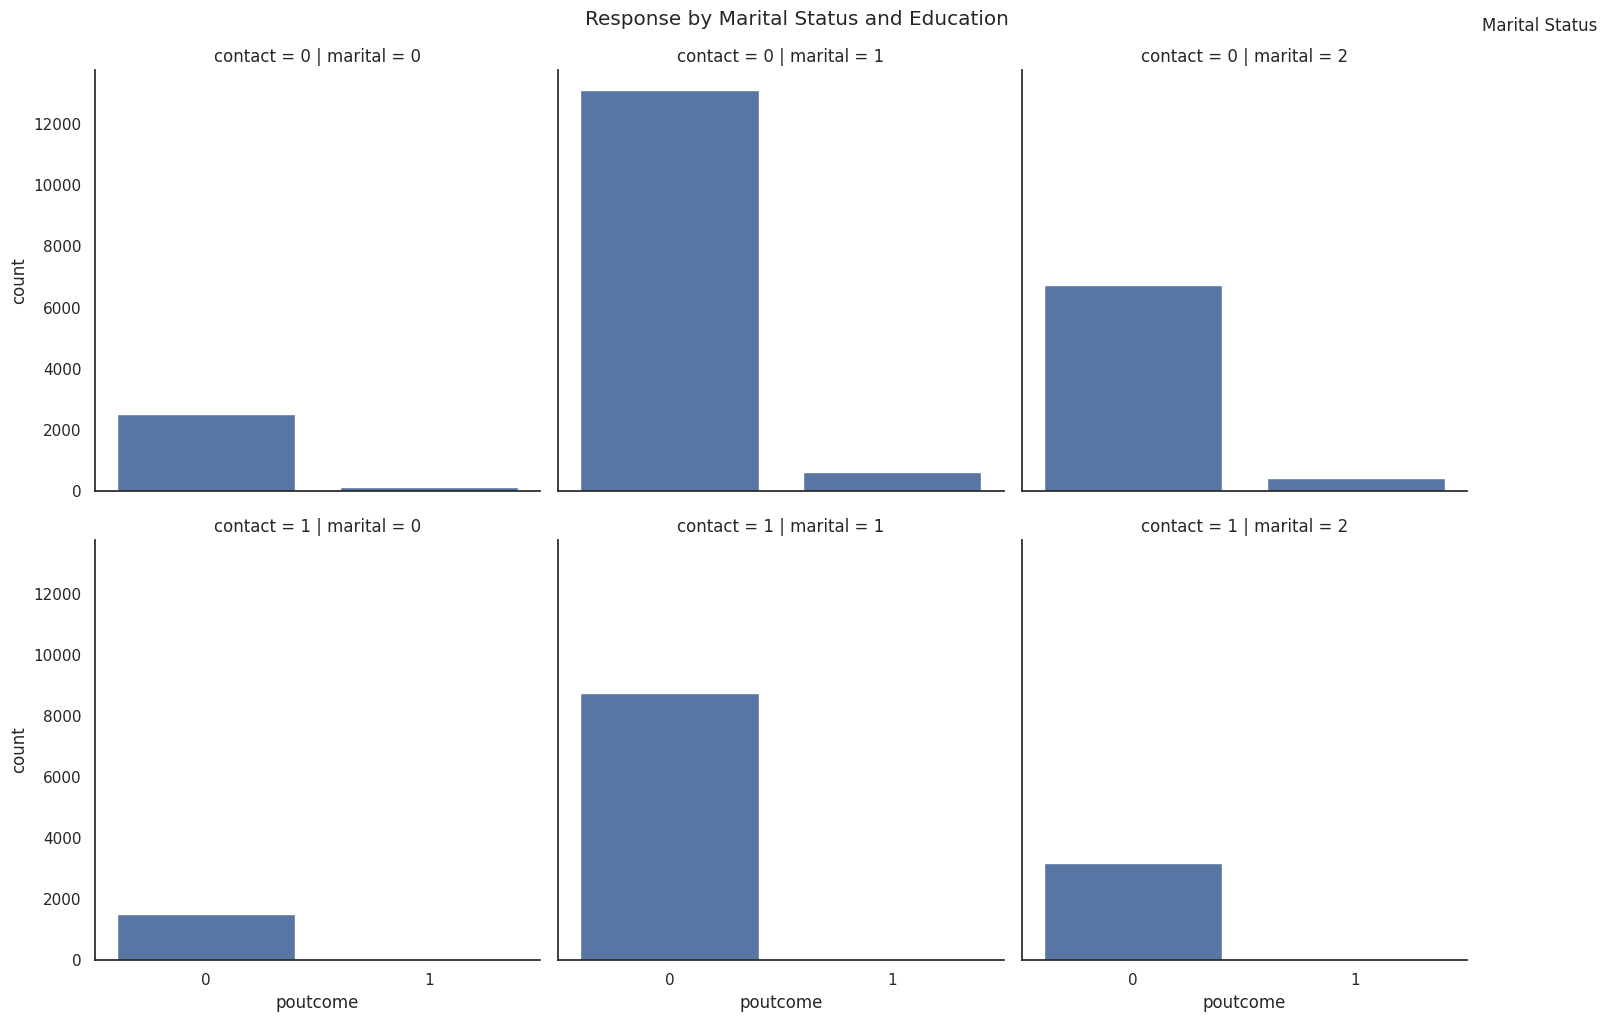

In [ ]:
sns.set()
sns.set_style('white')

graph2 = sns.countplot(data=df_im, x='poutcome', hue='marital')

# Create a FacetGrid for further customization
facet_grid = sns.FacetGrid(df_im, row="contact", col='marital', # row="education"
                            height=5, aspect=1)#col_wrap=2
# Map the countplot onto the FacetGrid
facet_grid.map(sns.countplot, "poutcome", order=df_im['poutcome'].unique())
# Add a legend
facet_grid.add_legend(title='Marital Status', bbox_to_anchor=(1, 1))
# Set the overall title
facet_grid.fig.suptitle("Response by Marital Status and Education", y=1.02)
facet_grid.set_titles(fontsize=25)
plt.show()


In [ ]:
#!pip install typing_extensions

In [ ]:
#from ydata_profiling import ProfileReport, compare

In [ ]:
'''report= ProfileReport(df=df_im, title="test")
report.to_notebook_iframe()'''

'report= ProfileReport(df=df_im, title="test")\nreport.to_notebook_iframe()'

# Machine Learning Model




Machine Learning Steps
Almost universally, regardless of which algorithm or type of task we're performing, building and evaluating a machine learning model with sklearn follows these steps:

* Perform any data preprocessing needed.
* Partition the data into features and targets.
* Split the data into training and test sets (and sometimes a third validation set).
* Create a configure whichever sklearn model object we're using.
* Train the model using its "fit" method.
* Test the model using its "predict" method.
* Use a model evaluation metric to see how well the model performs.
* If the model isn't performing well, we will repeat one or more of the above steps (sometimes all of them).

Once the model is performing adequately, we'll deploy it for use as part of some larger system.

For now, let's assume that this dataset is in the form we need, and we'll skip to step 2, partitioning the data.

In [ ]:
pd.set_option('display.max_columns', None)
df_im.head(5)

,age,marital,default,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,1,0,0,0,1,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,57,1,0,0,0,1,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,37,1,0,1,0,1,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,40,1,0,0,0,1,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,56,1,0,0,1,1,1,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_im.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep'],
      dtype='object')

In [ ]:
# Create a new dataframe called X that contians the features we're going
# to use to make predictions
X = df_im[['age', 'marital', 'contact',
        'previous','nr.employed',
       'euribor3m']]
X.head(5)

,age,marital,contact,previous,nr.employed,euribor3m
0,56,1,1,0,5191.0,4.857
1,57,1,1,0,5191.0,4.857
2,37,1,1,0,5191.0,4.857
3,40,1,1,0,5191.0,4.857
4,56,1,1,0,5191.0,4.857


In [ ]:
# Create a new dataframe called y that contians the target we're
# trying to predict
y=df_im['y']
y.unique()

array([0, 1], dtype=int8)

## Split Data

In [ ]:

# Import and use the train_test_split() function to split the X and y
# dataframes into training and test sets.
#
# The training data should contain 80% of the samples and
# the test data should contain 20% of the samples.
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.3, random_state=1)

# Use StandardScaler() to normolize data around a mean of 0
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
print(X_test_scaled)



[[ 0.09040373 -0.28292425  1.32118491 -0.35073227  0.33112684  0.7125554 ]
 [-0.19721226  1.37725633  1.32118491 -0.35073227  0.33112684  0.71313247]
 [ 0.66563571 -1.94310483 -0.75689632 -0.35073227  0.84533802  0.77545575]
 ...
 [ 2.67894762 -0.28292425 -0.75689632  1.65783117 -2.43258497 -1.57667123]
 [ 1.04912369 -0.28292425 -0.75689632 -0.35073227  0.84533802  0.77718696]
 [-0.19721226 -0.28292425  1.32118491  1.65783117 -2.43258497 -1.58417311]]


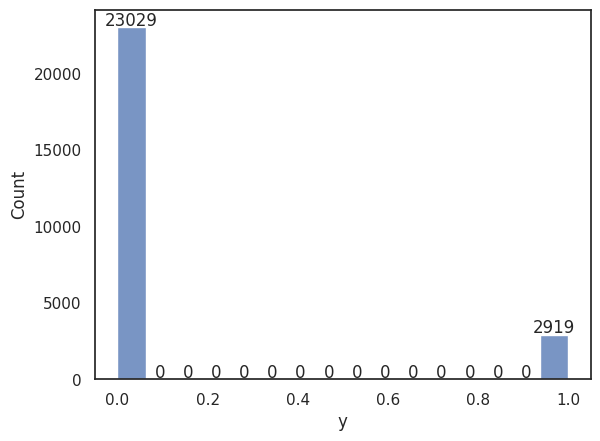

In [ ]:
# it seems that my Y training is imbalance becasue the non existing is bigger than other outcomes
ax=sns.histplot(data=y_train)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Dealing with imbalance

https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

In [ ]:
!pip install imblearn

In [ ]:
'''from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)

X_new, y_new= rus.fit_resample(X_train_scaled, y_train)#X_train_scaled  X_train

y_new.value_counts()'''

'from imblearn.under_sampling import RandomUnderSampler\nrus = RandomUnderSampler(random_state=1)\n\nX_new, y_new= rus.fit_resample(X_train_scaled, y_train)#X_train_scaled  X_train\n\ny_new.value_counts()'

In [ ]:
#oversampling
from imblearn.over_sampling import RandomOverSampler
# https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

ro = RandomOverSampler()

X_new, y_new = ro.fit_resample(X_train_scaled, y_train)

y_new.value_counts()

1    23029
0    23029
Name: y, dtype: int64

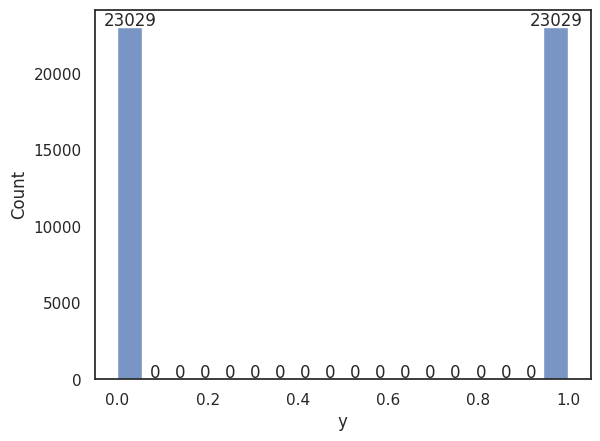

In [ ]:
ax=sns.histplot(data=y_new)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Training the tree model

In [ ]:
 from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10)#max_leaf_nodes=10, random_state=0

In [ ]:
clf = clf.fit(X_new, y_new)

[Text(0.5, 0.9375, 'x[4] <= -1.101\ngini = 0.5\nsamples = 46058\nvalue = [23029, 23029]'),
 Text(0.4090909090909091, 0.8125, 'gini = 0.237\nsamples = 12634\nvalue = [1738, 10896]'),
 Text(0.5909090909090909, 0.8125, 'x[5] <= -0.607\ngini = 0.462\nsamples = 33424\nvalue = [21291, 12133]'),
 Text(0.36363636363636365, 0.6875, 'x[5] <= -1.311\ngini = 0.497\nsamples = 10144\nvalue = [4684, 5460]'),
 Text(0.18181818181818182, 0.5625, 'x[5] <= -1.354\ngini = 0.485\nsamples = 5461\nvalue = [3206, 2255]'),
 Text(0.09090909090909091, 0.4375, 'gini = 0.5\nsamples = 2295\nvalue = [1124, 1171]'),
 Text(0.2727272727272727, 0.4375, 'gini = 0.45\nsamples = 3166\nvalue = [2082, 1084]'),
 Text(0.5454545454545454, 0.5625, 'x[5] <= -1.284\ngini = 0.432\nsamples = 4683\nvalue = [1478, 3205]'),
 Text(0.45454545454545453, 0.4375, 'gini = 0.289\nsamples = 1317\nvalue = [231, 1086]'),
 Text(0.6363636363636364, 0.4375, 'x[3] <= 0.654\ngini = 0.466\nsamples = 3366\nvalue = [1247, 2119]'),
 Text(0.545454545454545

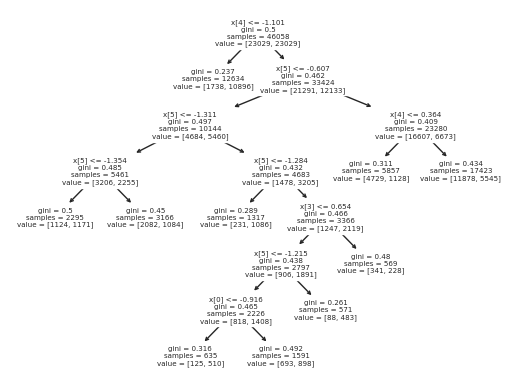

In [ ]:
tree.plot_tree(clf)

## Predictions with Model

In [ ]:
test_predictions=clf.predict(X_test_scaled) #X_test_scaled

In [ ]:
test_predictions

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [ ]:
y_train.count()

25948

## Evaluate

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predictions)

0.8086503012319036

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88      9832
           1       0.33      0.65      0.44      1289

    accuracy                           0.81     11121
   macro avg       0.64      0.74      0.66     11121
weighted avg       0.88      0.81      0.83     11121



In [ ]:
# confution Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, test_predictions)

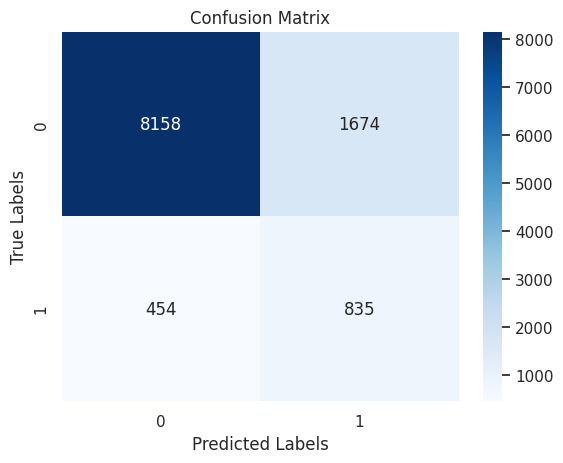

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
sns.set()

unique_labels = np.unique(y_test)

sns.heatmap(cm,fmt="d", annot=True, cmap="Blues",
             xticklabels=unique_labels, yticklabels=unique_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Use model

In [ ]:
df_use=pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv')

In [ ]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             410 non-null    int64  
 1   job             410 non-null    object 
 2   marital         410 non-null    object 
 3   education       410 non-null    object 
 4   default         410 non-null    object 
 5   housing         410 non-null    object 
 6   loan            410 non-null    object 
 7   contact         410 non-null    object 
 8   month           410 non-null    object 
 9   day_of_week     410 non-null    object 
 10  campaign        410 non-null    int64  
 11  pdays           410 non-null    int64  
 12  previous        410 non-null    int64  
 13  poutcome        410 non-null    object 
 14  emp.var.rate    410 non-null    float64
 15  cons.price.idx  410 non-null    float64
 16  cons.conf.idx   410 non-null    float64
 17  euribor3m       410 non-null    flo

In [ ]:
import numpy as np
df = df_use
df.replace(r"unknown", np.nan, inplace=True)

In [ ]:
df_use = df_use.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_use['marital'] = df_use['marital'].astype('category')
df_use['contact'] = df_use['contact'].astype('category')
df_use['default'] = df_use['default'].astype('category')
df_use['housing'] = df_use['housing'].astype('category')
df_use['loan'] = df_use['loan'].astype('category')
df_use['day_of_week'] = df_use['day_of_week'].astype('category')


# cat codes
df_use['marital'] = df_use['marital'].cat.codes
df_use['contact'] = df_use['contact'].cat.codes
df_use['default'] = df_use['default'].cat.codes
df_use['housing'] = df_use['housing'].cat.codes
df_use['day_of_week'] = df_use['day_of_week'].cat.codes
df_use=pd.get_dummies(df_use, columns=['job'], drop_first=True)
df_use=pd.get_dummies(df_use, columns=['education'], drop_first=True)
df_use = pd.get_dummies(df_use, columns=['month'], drop_first=True)

In [ ]:
df_use['poutcome'] = np.where((df_use["poutcome"] == "nonexistent") | (df_use["poutcome"] == "failure"), 0, 1)

In [ ]:
df_use

,age,marital,default,housing,loan,contact,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,26,1,0,1,no,0,3,2,999,0,0,1.4,93.918,-42.7,4.962,5228.1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,33,1,0,1,no,0,3,1,999,0,0,-1.8,92.893,-46.2,1.344,5099.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,45,0,0,0,yes,0,4,1,3,2,1,-1.7,94.055,-39.8,0.739,4991.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,37,0,0,1,no,1,0,12,999,0,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,34,2,0,0,no,0,4,1,999,0,0,-0.1,93.200,-42.0,4.120,5195.8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,32,2,0,0,no,0,0,3,999,0,0,-1.8,92.893,-46.2,1.250,5099.1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
406,42,1,0,1,no,0,1,9,999,0,0,1.4,93.918,-42.7,4.962,5228.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
407,51,1,0,0,yes,1,0,1,999,0,0,1.4,94.465,-41.8,4.967,5228.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
408,57,0,0,0,yes,0,0,1,999,0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
X_use = df_use[['age', 'marital', 'contact',
        'previous','nr.employed',
       'euribor3m']]
X.head(5)


,age,marital,contact,previous,nr.employed,euribor3m
0,56,1,1,0,5191.0,4.857
1,57,1,1,0,5191.0,4.857
2,37,1,1,0,5191.0,4.857
3,40,1,1,0,5191.0,4.857
4,56,1,1,0,5191.0,4.857


In [ ]:
X_use.count()
X_test_scaled = X_scaler.transform(X_use)

In [ ]:
test_predictions1=clf.predict(X_test_scaled)



In [ ]:
# Create a DataFrame with predictions
predictions_df1 = pd.DataFrame({'Prediction': test_predictions1})

# Save predictions to a CSV file
predictions_df1.to_csv('team8-module2-predictions.csv', index=False)